In [1]:
#impport necessary libraries/packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


In [2]:
#loading the dataset

data = pd.read_csv("/Users/cmoradajr/Downloads/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
#one hot encoding for categorical variables

data['Gender_Male'] = (data['Gender'] == 'Male').astype(int)
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,Male,19,15,39,1
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,0
4,5,Female,31,17,40,0


In [4]:
# Select features for clustering

features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']
X = data[features].values

In [5]:
# Standardize features

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
#descriptive statistics

data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000,0.440000
std,57.879185,13.969007,26.264721,25.823522,0.497633
min,1.000000,18.000000,15.000000,1.000000,0.000000
25%,50.750000,28.750000,41.500000,34.750000,0.000000
50%,100.500000,36.000000,61.500000,50.000000,0.000000
75%,150.250000,49.000000,78.000000,73.000000,1.000000
max,200.000000,70.000000,137.000000,99.000000,1.000000


In [7]:
#Assinging the features
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']
X = data[features].values

In [8]:
#feature scaling
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Gender_Male']])

In [9]:
#elbow method to find the optimal number of clusters
wcss = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    wcss.append(km.inertia_)

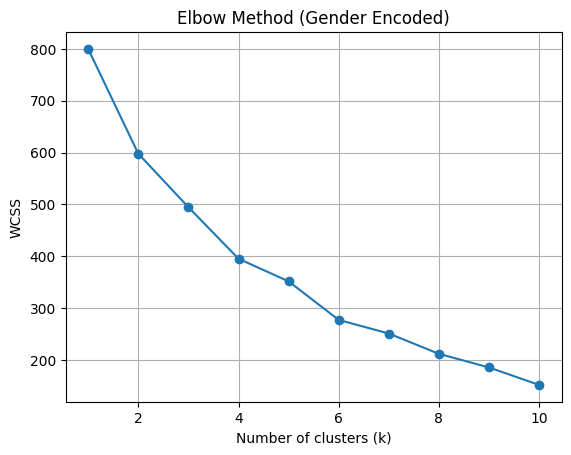

In [10]:
#plotting the elbow graph

plt.figure()
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method (Gender Encoded)')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid()
plt.show()


In [11]:
# based on the above elbow graph, the WCSS plot shows a noticeable bend at K=4-5

In [12]:
#Sillhouette analysis

sil_scores = []
k_values = list(range(2, 11))
for k in k_values:
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    sil_scores.append(silhouette_score(X_scaled, labels))

<function matplotlib.pyplot.show(close=None, block=None)>

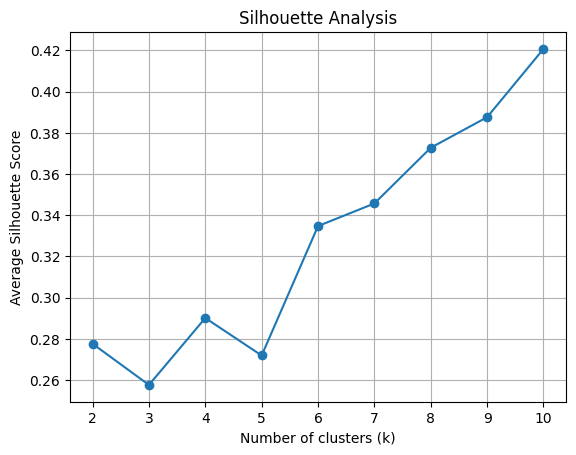

In [13]:
#Sillhoutte graph

plt.figure()
plt.plot(k_values, sil_scores, marker='o')
plt.title('Silhouette Analysis')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.grid()
plt.show

In [ ]:
# The silhouette curve rises steadily from 2 to 10 clusters, but adopting 10 clusters would split the data into very small groups. The elbow plot levels off around four to five clusters, so opting for the higher end of that range, five clusters, offers a sensible compromise

In [14]:
#kmeans clustering with the optimal number of clusters

optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42)
labels_final = kmeans_final.fit_predict(X_scaled)
data['Cluster_final'] = labels_final

In [15]:
# Convert cluster centres back to original scale

centers_final = scaler.inverse_transform(kmeans_final.cluster_centers_)
centers_final_df = pd.DataFrame(centers_final, columns=features)
centers_final_df['Cluster'] = range(1, optimal_k + 1)
centers_final_df['Gender_Male'] = centers_final_df['Gender_Male'].round().astype(int)

In [16]:
#cluster centers and cluster count
print("\nFinal K-means clustering (k={}): cluster centers:".format(optimal_k))
print(centers_final_df[['Cluster','Age','Annual Income (k$)','Spending Score (1-100)','Gender_Male']].round({'Age':1,'Annual Income (k$)':1,'Spending Score (1-100)':1}))
print("\nCluster counts for k={}:".format(optimal_k))
print(data['Cluster_final'].value_counts().sort_index())



Final K-means clustering (k=5): cluster centers:
   Cluster   Age  Annual Income (k$)  Spending Score (1-100)  Gender_Male
0        1  56.5                46.1                    39.3            1
1        2  39.5                85.2                    14.0            1
2        3  28.7                60.9                    70.2            1
3        4  37.9                82.1                    54.4            0
4        5  27.3                38.8                    56.2            0

Cluster counts for k=5:
Cluster_final
0    51
1    20
2    42
3    49
4    38
Name: count, dtype: int64


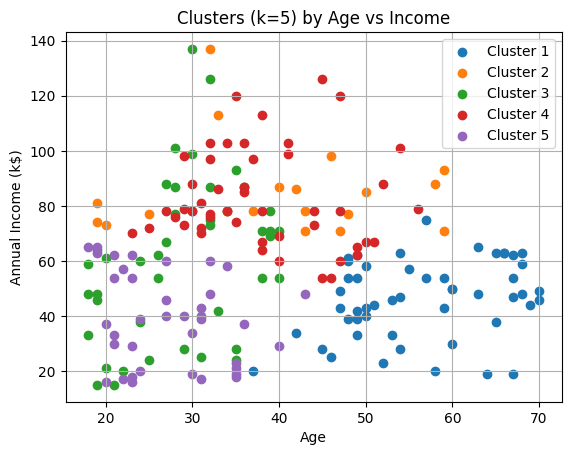

In [17]:
#Visualization of clusters: Age vs Annual Income
plt.figure()
for c in range(optimal_k):
    plt.scatter(data.loc[data['Cluster_final'] == c, 'Age'],
                data.loc[data['Cluster_final'] == c, 'Annual Income (k$)'],
                label=f'Cluster {c+1}')
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.title(f'Clusters (k={optimal_k}) by Age vs Income')
plt.legend()
plt.grid()
plt.show()

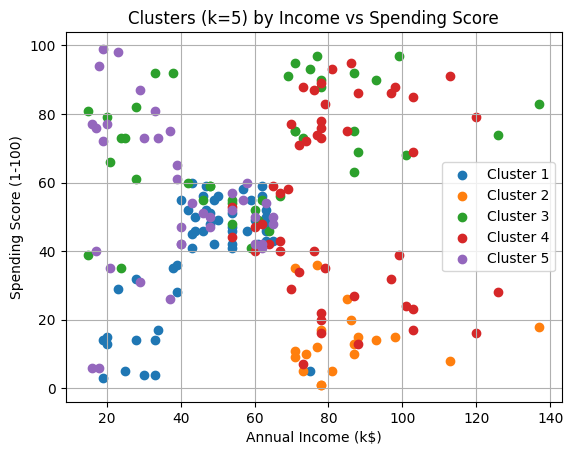

In [18]:
#Scatter plot: Annual Income vs Spending Score
plt.figure()
for c in range(optimal_k):
    plt.scatter(data.loc[data['Cluster_final'] == c, 'Annual Income (k$)'],
                data.loc[data['Cluster_final'] == c, 'Spending Score (1-100)'],
                label=f'Cluster {c+1}')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title(f'Clusters (k={optimal_k}) by Income vs Spending Score')
plt.legend()
plt.grid()
plt.show()

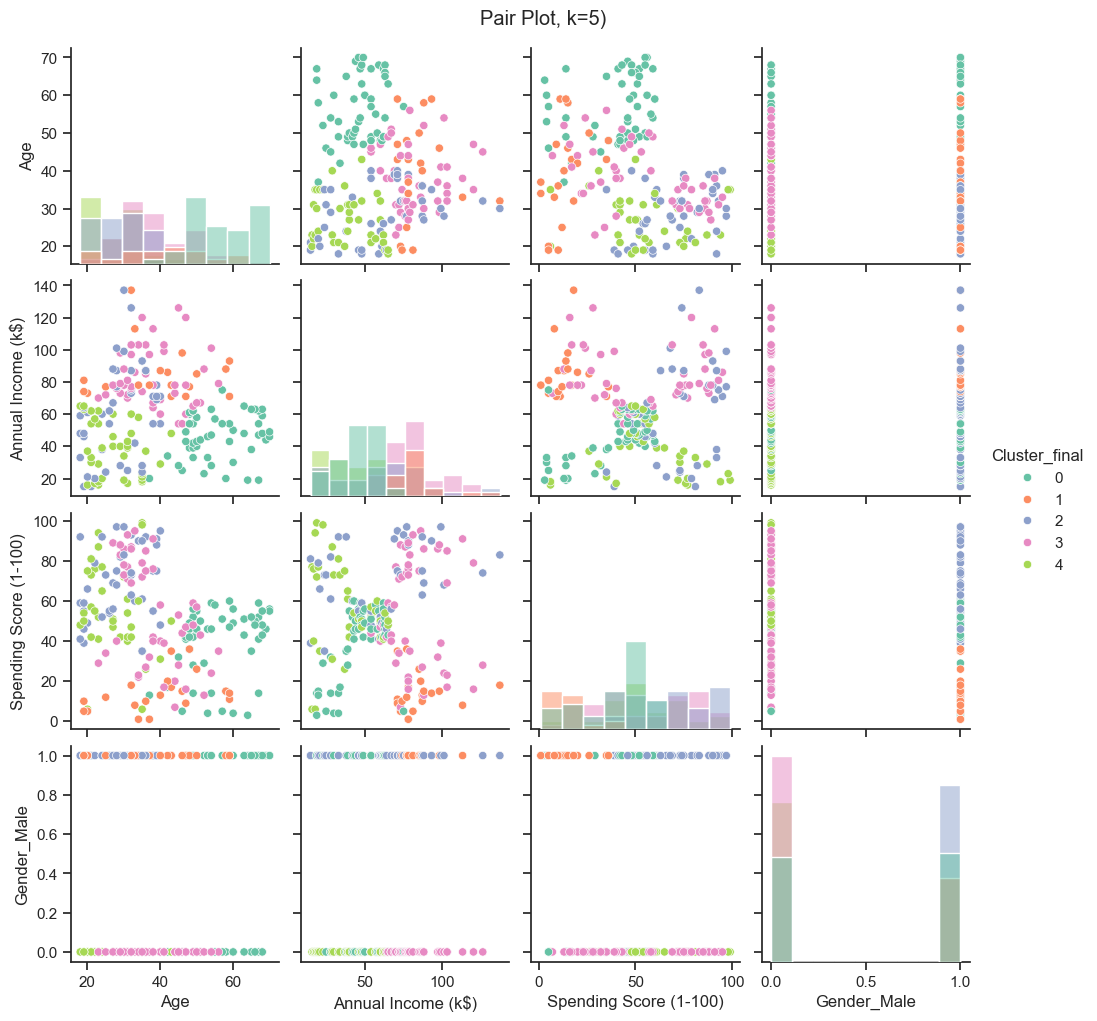

In [19]:
#Pairplot for final clustering

sns.set(style="ticks")
pair_plot_final = sns.pairplot(
    data[['Age','Annual Income (k$)','Spending Score (1-100)','Gender_Male','Cluster_final']],
    hue='Cluster_final',
    diag_kind='hist',
    palette='Set2'
)
pair_plot_final.fig.suptitle(f'Pair Plot, k={optimal_k})', y=1.02)
plt.show()
